University of California Los Angeles  
Master of Quantitative Economics -MQE-  
ECON 451 - Financial Institutions and Monetary Policy

<p style='text-align: right;'>Bella Rakhina </p>
<p style='text-align: right;'>William Ebert </p>
<p style='text-align: right;'>Nikolas Papadatos </p>
<p style='text-align: right;'>Luis Alejandro Samayoa</p>

<div style="text-align: center;">

<h1>Homework 1 - Flow of Funds</h1>

</div>

## Question 1
Go through the list of sectors in the Flow of Funds Levels and pick one sector to study. Write a short few sentences on why you picked this sector.

**Answer:**

*We select the sector of U.S. commercial banks (L.111 U.S.-Chartered Depository Institutions). The commercial banking sector holds immense significance in driving economic activity forward, making it a compelling area for analysis. Serving as crucial financial intermediaries, commercial banks play a pivotal role in connecting depositors with borrowers, thus facilitating investment, consumption, and business expansion. Through fractional reserve banking, they possess the unique ability to create money, effectively increasing the money supply and stimulating economic growth. Additionally, their central position within the financial market grants them significant influence over market dynamics and stability, with changes in lending practices and interest rates impacting asset prices and overall economic sentiment. Moreover, commercial banks serve as key conduits for transmitting monetary policy initiatives, executing adjustments in interest rates and policy tools to influence borrowing costs, credit availability, and investment decisions. Their substantial involvement in credit and mortgage markets further underscores their importance, shaping consumer spending, business investment, and housing market dynamics*.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

## Question 2
Plot the time series of the main components for this sector, assets and liabilities. Title your plots and the axis appropriately. Note the units.

a) Are the assets short term or long term 

b) Are the liabilities short term or long term

* *Import libraries*

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import squarify

#### Importing datasets
* Assets
* Liabilities
* Classification
  
Malaka, here we need to import the same data for liabilities, I think that we can estimate the total assets from here, merge with total liabilities and use your code to generate the first plot, with the total trends.

In [50]:
# Importing the datasets
df = pd.read_excel('L.111 Banks_assets.xlsx', sheet_name='assets_clean', index_col=0, parse_dates=True)
assets_terms = pd.read_excel('L.111 Banks_assets.xlsx', sheet_name='Term', index_col=0)


# Assets dataframe without 'total financial assets'
assets = df.drop(['total financial assets'], axis=1)
assets = assets/1000

In [51]:
df2 = pd.read_excel('L.111 Banks_liabilities.xlsx', sheet_name='Clean Liabilities', index_col=0, parse_dates=True)
liabilities_terms = pd.read_excel('L.111 Banks_liabilities.xlsx', sheet_name='Term', index_col=0)

liab = df2 / 1000

In [52]:
# Obtain the total assets, total liabilities and equity capital
Total_Assets = assets.sum(axis=1)
Total_Liabilities = liab.sum(axis=1) - liab[' capital market equity and investment fund shares ']
Equity_Capital = liab[' capital market equity and investment fund shares ']
Time = Total_Assets.index

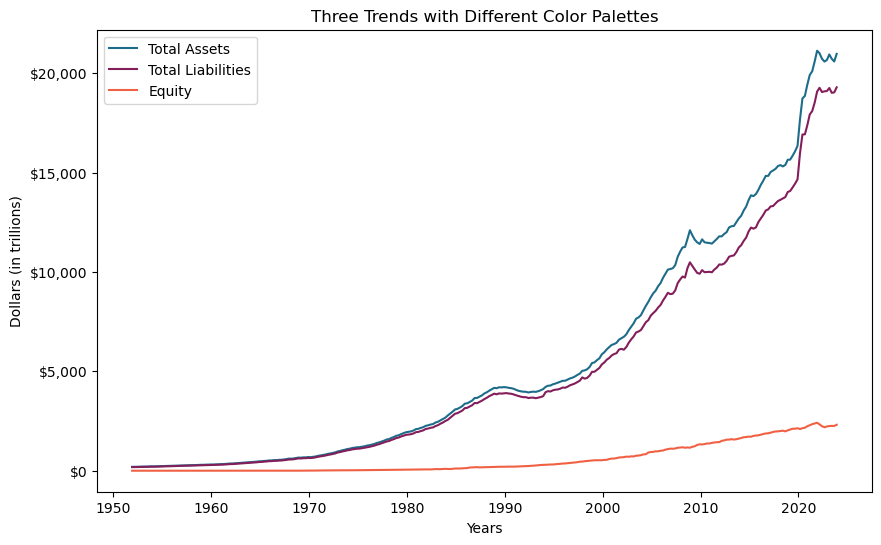

In [53]:
# Set different color palettes for each trend
palette1 = sns.color_palette("crest_r", 2)  # Trend 1 palette
palette2 = sns.color_palette("rocket", 2)  # Trend 2 palette
palette3 = sns.color_palette("rocket_r", 2)  # Trend 3 palette

# Plot the trends
plt.figure(figsize=(10, 6))

# Plot each trend separately and manually set the line color
sns.lineplot(x=Time, y=Total_Assets, label='Total Assets', color=palette1[0])
sns.lineplot(x=Time, y=Total_Liabilities, label='Total Liabilities', color=palette2[0])
sns.lineplot(x=Time, y=Equity_Capital, label='Equity', color=palette3[0])

# Define formatter function
formatter = FuncFormatter(lambda x, _: '${:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
#plt.xticks(Total_Assets.index, rotation=45, )  # Rotate year labels

plt.title('Three Trends with Different Color Palettes')
plt.xlabel('Years')
plt.ylabel('Dollars (in trillions)')
plt.legend()
plt.show()

### Assets
Figure X illustrates the historical composition of assets held by commercial banks in the U.S. The primary component among these assets is depository institution loans, which represent [explain briefly what depository institution loans are]. Agency-backed securities also constitute a significant portion of the assets.

Notably, there has been a notable uptick in the account of depository institution reserves since 2020. This increase in liquidity may be attributed to the implementation of economic COVID programs aimed at stabilizing the economy.

A pertinent observation is that the assets of commercial banks typically decrease following major economic recessions (80's, 2008 and 2020). As expected, the majority of these assets are long-term, comprising 81.5% of the total financial assets. This trend aligns with the evolution of maturity transformation within the banking industry.

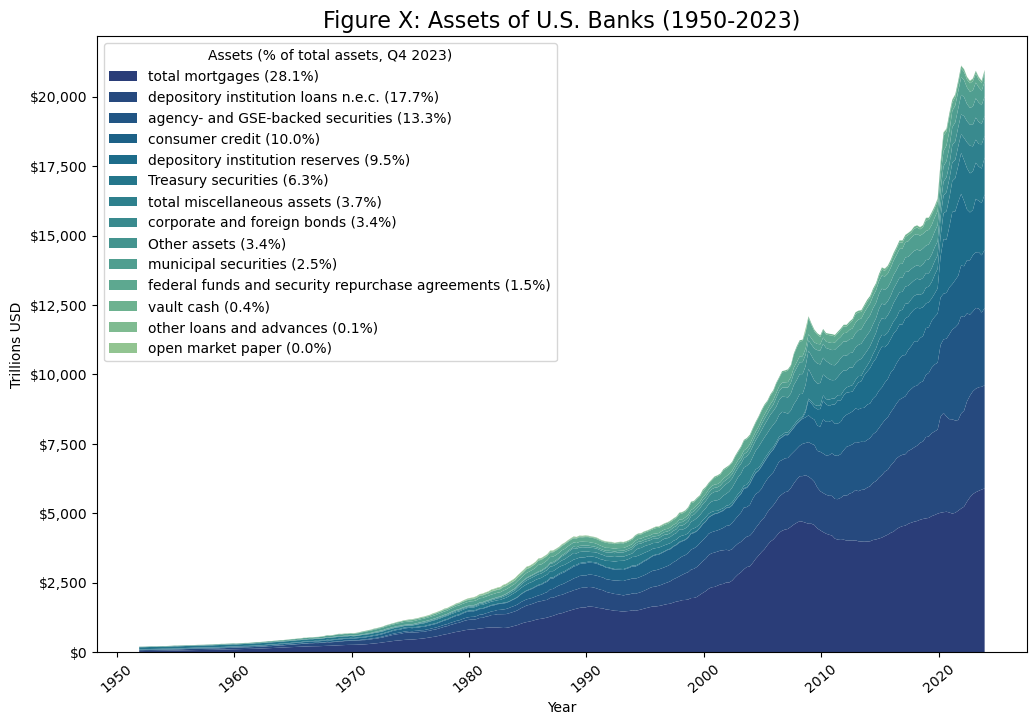

In [54]:
# Sort variables based on their last observation (highest to lowest value)
df_sorted = assets.iloc[:, assets.iloc[-1].argsort()[::-1]]

# Define labels with percentages
#labels = [f"{col}\n({(df_sorted[col].iloc[-1] / df_sorted.iloc[-1].sum() * 100):.1f}%)" for col in df_sorted.columns]
labels = [f"{col} ({(df_sorted[col].iloc[-1] / df_sorted.iloc[-1].sum() * 100):.1f}%)" for col in df_sorted.columns]

# Get the color palette
palette = sns.color_palette("crest_r", len(labels))  # Rocket is a good alternative for liability accounts

# Plot stackplot
fig, ax = plt.subplots(figsize=(12, 8))
ax.stackplot(df_sorted.index, df_sorted.values.T, labels=labels, colors=palette)

# Add legend
ax.legend(loc='upper left', shadow=False, ncol=1, title = 'Assets (% of total assets, Q4 2023)')

# Add x and y labels
ax.set_xlabel("Year")
ax.set_ylabel("Trillions USD")

# Rotate x-axis labels
plt.xticks(rotation=40)

# Format y-axis ticks as currency
formatter = FuncFormatter(lambda x, _: '${:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

# Remove the frame
#ax.set_frame_on(False)
plt.title("Figure X: Assets of U.S. Banks (1950-2023)", fontsize=16)
plt.show()

In [55]:
# Order values in assets_terms, biggest to smallest
assets_terms = assets_terms.sort_values(by= 'Value', ascending=False)
assets_terms['Value'] = assets_terms.Value/1000

# Proportion of each asset term
assets_terms['Proportion'] = assets_terms['Value']/assets_terms['Value'].sum()
assets_terms

,Account,Value,Term,Proportion
23,total mortgages,5895.092,Long-term,0.281160
21,depository institution loans n.e.c.,3713.624,Long-term,0.177117
7,agency- and GSE-backed securities,2782.457,Long-term,0.132706
24,consumer credit,2100.672,Long-term,0.100189
2,depository institution reserves,1987.050,Short-term,0.094770
6,Treasury securities,1329.206,Long-term,0.063395
32,total miscellaneous assets,777.390,Short-term,0.037077
14,corporate and foreign bonds,718.202,Long-term,0.034254
25,Other assets,706.168,Short-term,0.033680
13,municipal securities,531.851,Long-term,0.025366


C:\Users\nikpa\AppData\Local\Temp\ipykernel_30940\568526362.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  assets_terms_grouped = assets_terms.groupby('Term').sum()


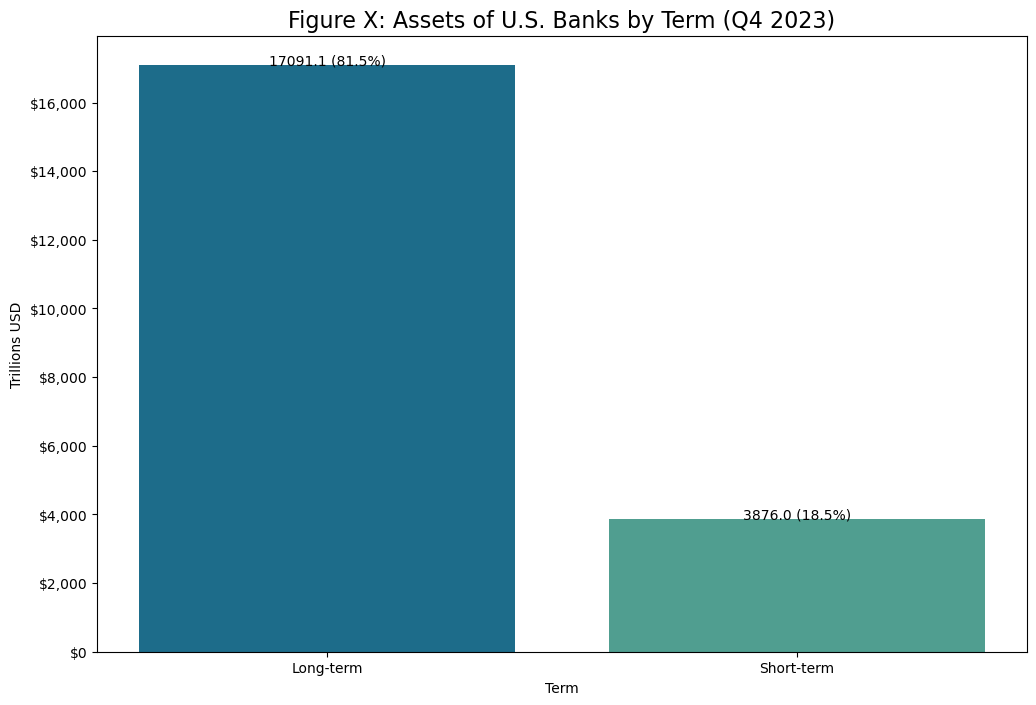

In [56]:
# Group by terms, sum the Proportion
assets_terms_grouped = assets_terms.groupby('Term').sum()

# Estimate the proportion of the terms
assets_terms_grouped['Proportion'] = assets_terms_grouped['Value']/assets_terms_grouped['Value'].sum()

# Bar plot of terms in assets
fig, ax = plt.subplots(figsize=(12, 8))
palette2 = sns.color_palette("crest_r", 2)
ax.bar(assets_terms_grouped.index, assets_terms_grouped['Value'], color=palette2)
ax.set_xlabel("Term")
ax.set_ylabel("Trillions USD")
formatter = FuncFormatter(lambda x, _: '${:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

# Add text labels
for i, v in enumerate(assets_terms_grouped['Value']):
    ax.text(i, v + 0.5, f"{v:.1f} ({assets_terms_grouped['Proportion'].iloc[i]*100:.1f}%)", color='black', ha='center')
plt.title("Figure X: Assets of U.S. Banks by Term (Q4 2023)", fontsize=16)
plt.show()

### Liabilities

### Liabilities Composition Analysis (Q4 2023)

Figure K offers insights into the historical composition of liabilities among commercial banks in the U.S. Notably, time and savings deposits emerge as the primary component, constituting approximately 52% of the total liabilities. Additionally, checkable deposits contribute significantly, collectively representing around 80% of the total figure. This dominance of deposit-based liabilities underscores the fundamental role of customer deposits in bank financing.

Over the decades since the 1950s, there has been a consistent upward trajectory in bank liabilities, with a remarkable aspect being the predominance of long-term liabilities. Despite the conventional expectation of a higher proportion of short-term liabilities in banking operations, we see that long-term liabilities hold substantial significance, representing approximately 69% of the total liabilities. This enduring trend highlights banks' adeptness in attracting stable funding sources over extended periods, facilitating long-term lending and investment activities.

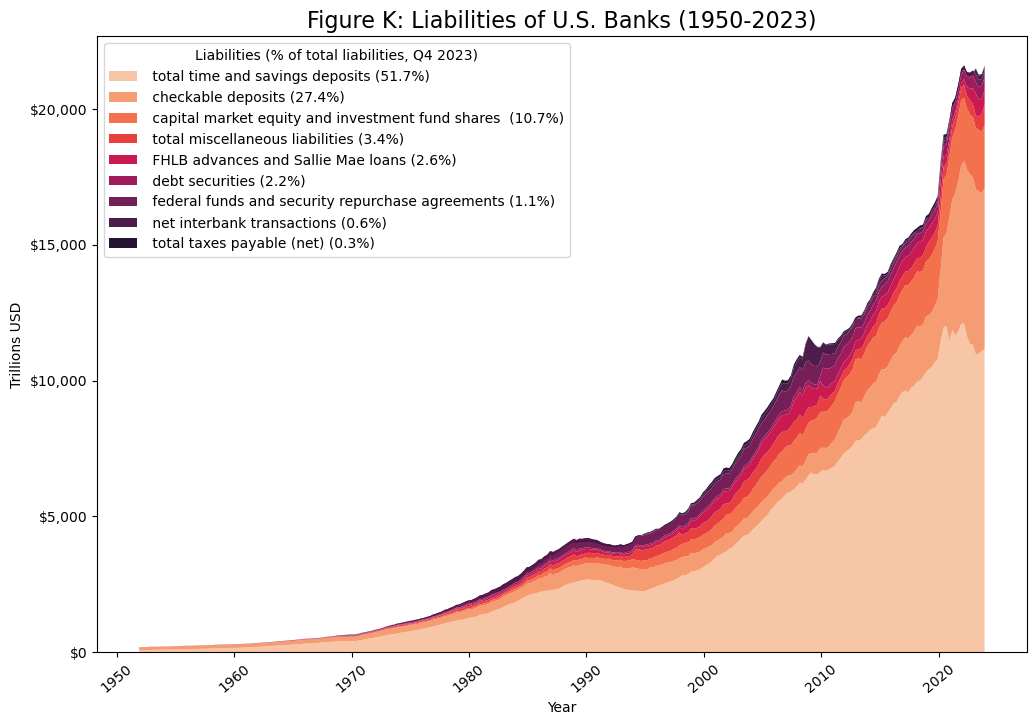

In [57]:
# Sort variables based on their last observation (highest to lowest value)
df_sorted2 = liab.iloc[:, liab.iloc[-1].argsort()[::-1]]

# Define labels with percentages
#labels = [f"{col}\n({(df_sorted[col].iloc[-1] / df_sorted.iloc[-1].sum() * 100):.1f}%)" for col in df_sorted.columns]
labels2 = [f"{col} ({(df_sorted2[col].iloc[-1] / df_sorted2.iloc[-1].sum() * 100):.1f}%)" for col in df_sorted2.columns]

# Get the color palette
palette = sns.color_palette("rocket_r", len(labels2))  # Rocket is a good alternative for liability accounts

# Plot stackplot
fig, ax = plt.subplots(figsize=(12, 8))
ax.stackplot(df_sorted2.index, df_sorted2.values.T, labels=labels2, colors=palette)

# Add legend
ax.legend(loc='upper left', shadow=False, ncol=1, title = 'Liabilities (% of total liabilities, Q4 2023)')

# Add x and y labels
ax.set_xlabel("Year")
ax.set_ylabel("Trillions USD")

# Rotate x-axis labels
plt.xticks(rotation=40)

# Format y-axis ticks as currency
formatter = FuncFormatter(lambda x, _: '${:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

# Remove the frame
#ax.set_frame_on(False)
plt.title("Figure K: Liabilities of U.S. Banks (1950-2023)", fontsize=16)
plt.show()

In [58]:
# Order values in assets_terms, biggest to smallest
liabilities_terms = liabilities_terms.sort_values(by= 'Value', ascending=False)
liabilities_terms['Value'] = liabilities_terms.Value/1000

# Proportion of each asset term
liabilities_terms['Proportion'] = liabilities_terms['Value']/assets_terms['Value'].sum()
liabilities_terms

,Value,Term,Proportion
Account,,,
total time and savings deposits,11173.773,Long-Term,0.532920
checkable deposits,5918.590,Short-Term,0.282280
capital market equity and investment fund shares,2314.001,Long-Term,0.110364
total miscellaneous liabilities,738.259,Long-Term,0.035210
FHLB advances and Sallie Mae loans,552.618,Short-Term,0.026356
debt securities,471.213,Long-Term,0.022474
federal funds and security repurchase agreements,244.922,Short-Term,0.011681
net interbank transactions,127.528,Long-Term,0.006082
total taxes payable (net),56.747,Long-Term,0.002706


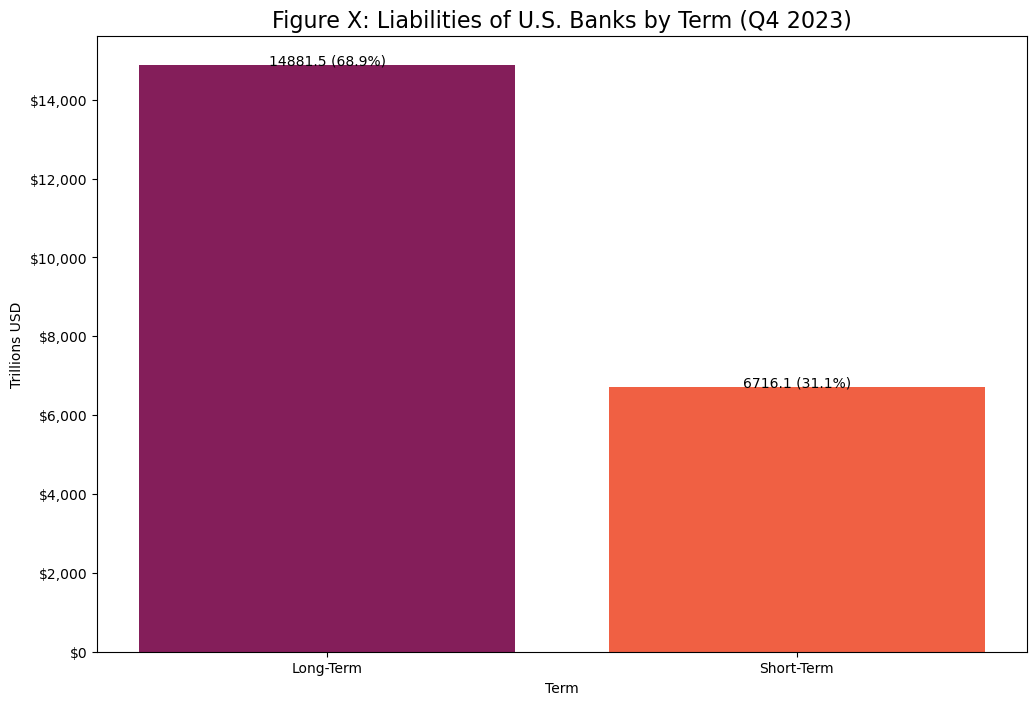

In [81]:
# liabilities_terms# Group by terms, sum the Proportion
liabilities_terms_grouped = liabilities_terms.groupby('Term').sum()

# Estimate the proportion of the terms
liabilities_terms_grouped['Proportion'] = liabilities_terms_grouped['Value']/liabilities_terms_grouped['Value'].sum()

# Bar plot of terms in assets
fig, ax = plt.subplots(figsize=(12, 8))
palette2 = sns.color_palette("rocket", 2)
ax.bar(liabilities_terms_grouped.index, liabilities_terms_grouped['Value'], color=palette2)
ax.set_xlabel("Term")
ax.set_ylabel("Trillions USD")
formatter = FuncFormatter(lambda x, _: '${:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

# Add text labels
for i, v in enumerate(liabilities_terms_grouped['Value']):
    ax.text(i, v + 0.5, f"{v:.1f} ({liabilities_terms_grouped['Proportion'].iloc[i]*100:.1f}%)", color='black', ha='center')
plt.title("Figure X: Liabilities of U.S. Banks by Term (Q4 2023)", fontsize=16)
plt.show()

In [76]:
holder = pd.read_excel('Issuer-to-Holder.xlsx', sheet_name='Banks as Holders')
holder = holder.head(15)
holder

,Row Labels,Sum of Level,Proportions
0,Households,5472483.2,0.254461
1,Nonfin Noncorp Bus,3565507.4,0.165790
2,GSE and Agency,2819574.9,0.131105
3,Nonfin Corp Bus,2675612.5,0.124411
4,Monetary Authority,2158609.4,0.100372
5,Rest of World,1978394.2,0.091992
6,Federal Govt.,1333900.1,0.062024
7,State/Local Govt.,423665.1,0.019700
8,Finance Companies,236954.9,0.011018
9,Life Ins.,234791.6,0.010917


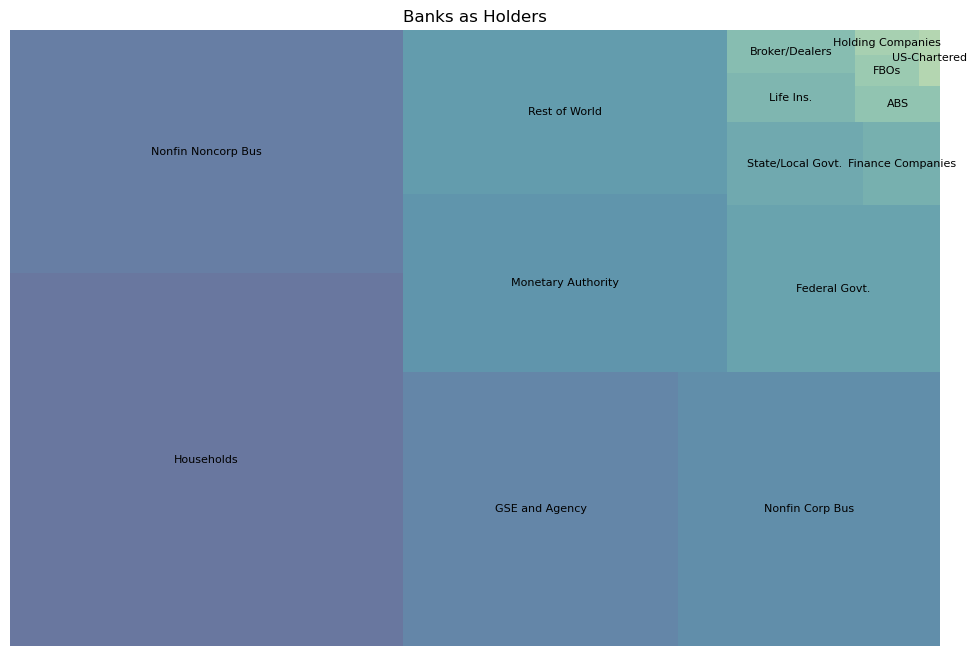

In [77]:
# Plot treemap
plt.figure(figsize=(12, 8))

# Define a palette of colors
custom_palette = sns.color_palette("crest_r", n_colors=len(holder))

# Plot treemap using squarify
squarify.plot(sizes=holder['Sum of Level'], label=holder['Row Labels'], color=custom_palette, alpha=0.7, text_kwargs={'fontsize': 8})

# Remove axis
plt.axis('off')
plt.title('Banks as Holders')
plt.show()

In the case of Banks as the Holder of the Financial Instruments, acting as creditor, the main counterparties are households (25%), non-financial companies (17%), GSE (13%) and Non-Corporate Businesses (12%). We also observe a notable amount of 10% with the Monetary authority.

In [78]:
issuer = pd.read_excel('Issuer-to-Holder.xlsx', sheet_name='Banks as Issuers')
issuer = issuer.head(15)
issuer

,Row Labels,Sum of Level,Proportions
0,Households,11192019.5,0.516596
1,Holding Companies,2846932.4,0.131407
2,Nonfin Corp Bus,2130217.0,0.098325
3,Nonfin Noncorp Bus,1758380.4,0.081162
4,Rest of World,1450067.2,0.066931
5,State/Local Govt.,799943.6,0.036923
6,GSE and Agency,629848.1,0.029072
7,MMF,349837.0,0.016148
8,Life Ins.,259192.7,0.011964
9,Pensions,178190.3,0.008225


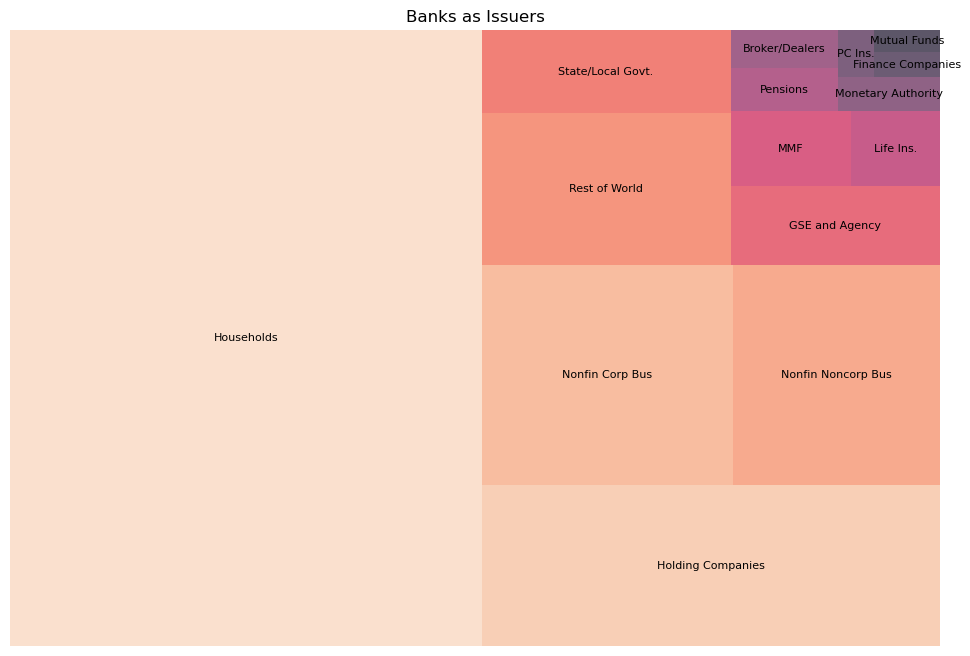

In [79]:
# Plot treemap
plt.figure(figsize=(12, 8))

# Define a palette of colors
custom_palette = sns.color_palette("rocket_r", n_colors=len(issuer))

# Plot treemap using squarify
squarify.plot(sizes=issuer['Sum of Level'], label=issuer['Row Labels'], color=custom_palette, alpha=0.7, text_kwargs={'fontsize': 8})

# Remove axis
plt.axis('off')
plt.title('Banks as Issuers')
plt.show()

In the case of Banks as the Issuer of the Financial Instruments, acting as lender, the main counterparties are households (52%), Holding Companies (13%), Non-Fiancial Corporate Businesses (9%) and Non-Fiancial Non-Corporate Businesses.